In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Cargar y limpiar datos
df = pd.read_csv('aptitudes_ninja.csv')
df = df[(df["fuerza_fisica"] >= 0) & (df["control_chakra"] >= 0)].copy()


# 2. Seleccionar variables
X = df[["fuerza_fisica", "control_chakra"]]

# 3. NORMALIZAR los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

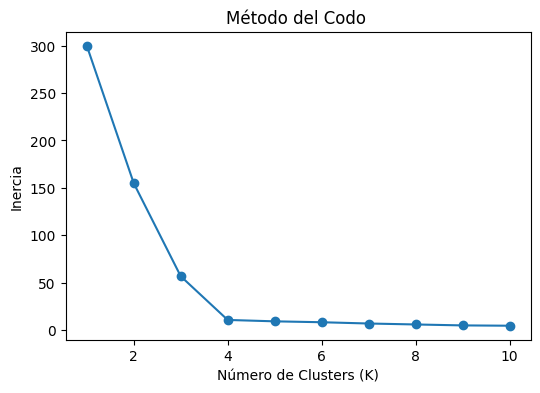

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
# ¡Importante! Usamos los datos normalizados (X_scaled_df)
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled_df)
    inertias.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo ")
plt.show()

In [55]:
k_optimo = 4

# Entrenamos con los datos normalizados
modelo_final = KMeans(n_clusters=k_optimo, random_state=42)
df["cluster"] = modelo_final.fit_predict(X_scaled_df)

# Obtenemos los centroides y los devolvemos a su escala original para leerlos bien
centroides_normalizados = modelo_final.cluster_centers_
centroides_reales = scaler.inverse_transform(centroides_normalizados)

print("Centroides (Escala original):")
print(centroides_reales)

Centroides (Escala original):
[[24.8148     25.8586    ]
 [35.136      90.42333333]
 [86.3155     30.05375   ]
 [94.43933333 93.33133333]]


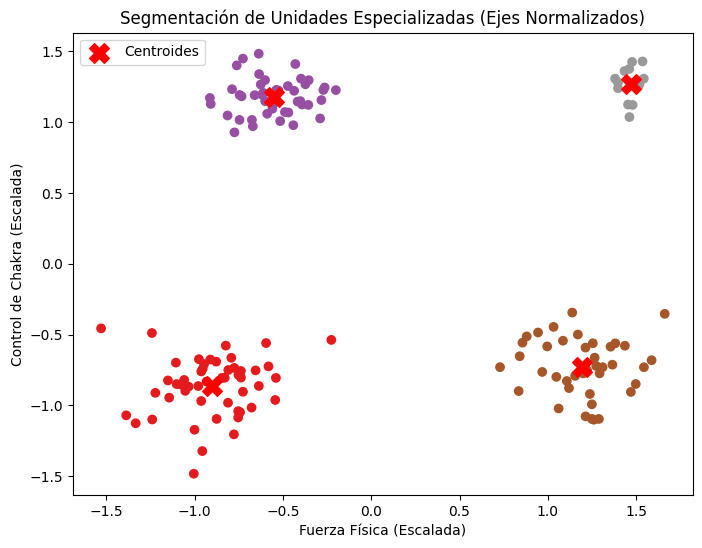

In [57]:
plt.figure(figsize=(8,6))

# Dibujamos los puntos usando los datos NORMALIZADOS
plt.scatter(X_scaled_df["fuerza_fisica"],
            X_scaled_df["control_chakra"],
            c=df["cluster"],
            cmap="Set1")

# Dibujar centroides (usando los directamente calculados por el modelo normalizado)
plt.scatter(centroides_normalizados[:, 0],
            centroides_normalizados[:, 1],
            c='red',
            marker='X',
            s=200,
            label='Centroides')

plt.xlabel("Fuerza Física (Escalada)")
plt.ylabel("Control de Chakra (Escalada)")
plt.title("Segmentación de Unidades Especializadas (Ejes Normalizados)")
plt.legend()

plt.show()